In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/food-recipe/zero_waste_recipe_dataset.csv')

def suggest_recipe(user_ingredients):

    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['Recipe Description'])

    user_vector = tfidf.transform([user_ingredients])

    cos_sim = cosine_similarity(user_vector, tfidf_matrix)


    best_match_idx = cos_sim.argmax()
    recipe = df.iloc[best_match_idx]

    return recipe['Suggested Recipe'], recipe['Recipe Description']

user_input = "old bread and olive oil"
recipe, description = suggest_recipe(user_input)
print(f"Suggested Recipe: {recipe}")
print(f"Description: {description}")


Suggested Recipe: Croutons
Description: Cube the old bread, toss with olive oil and seasoning, bake until crispy. Great for soups and salads.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

df['Recipe Type'] = ['Snack', 'Meal', 'Snack', 'Meal', 'Beauty', 'Fertilizer', 'Meal', 'Meal', 'Snack', 'Syrup']

X_train, X_test, y_train, y_test = train_test_split(df['Recipe Description'], df['Recipe Type'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.5


In [11]:
from textblob import TextBlob
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/food-recipe/zero_waste_recipe_dataset.csv')

def get_sentiment(description):
    blob = TextBlob(description)
    sentiment = blob.sentiment.polarity
    return sentiment

df['Sentiment'] = df['Recipe Description'].apply(get_sentiment)

print(df[['Suggested Recipe', 'Sentiment']].head())


                 Suggested Recipe  Sentiment
0                        Croutons       0.45
1               Banana Peel Curry       0.00
2  Baked Potato Skins with Cheese       0.60
3       Spinach & Cheese Frittata       0.00
4        Coffee Ground Body Scrub       0.00


<ipython-input-13-b2b4143549e1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recipe Type', data=df, palette='viridis')


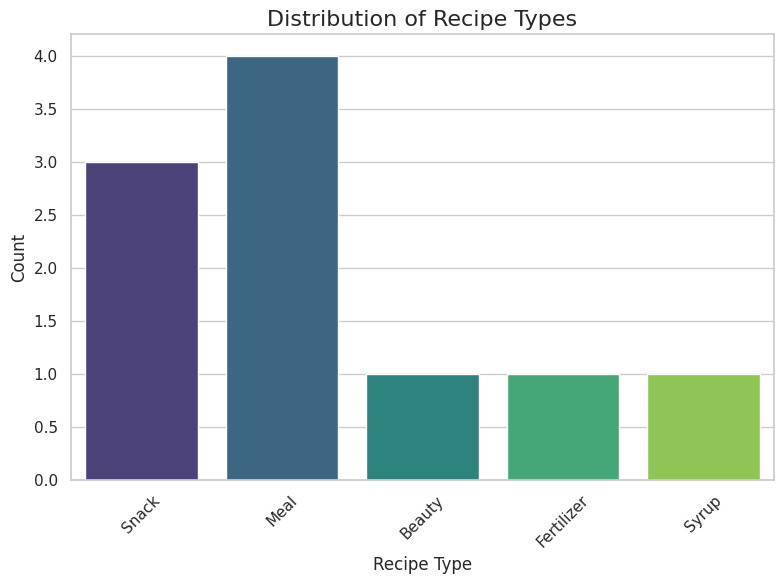

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (make sure the dataset is in the same directory or adjust the path)
df = pd.read_csv('/content/drive/MyDrive/food-recipe/zero_waste_recipe_dataset.csv')

# Manually add some recipe categories for visualization
df['Recipe Type'] = ['Snack', 'Meal', 'Snack', 'Meal', 'Beauty', 'Fertilizer', 'Meal', 'Meal', 'Snack', 'Syrup']

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Recipe Type', data=df, palette='viridis')
plt.title('Distribution of Recipe Types', fontsize=16)
plt.xlabel('Recipe Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


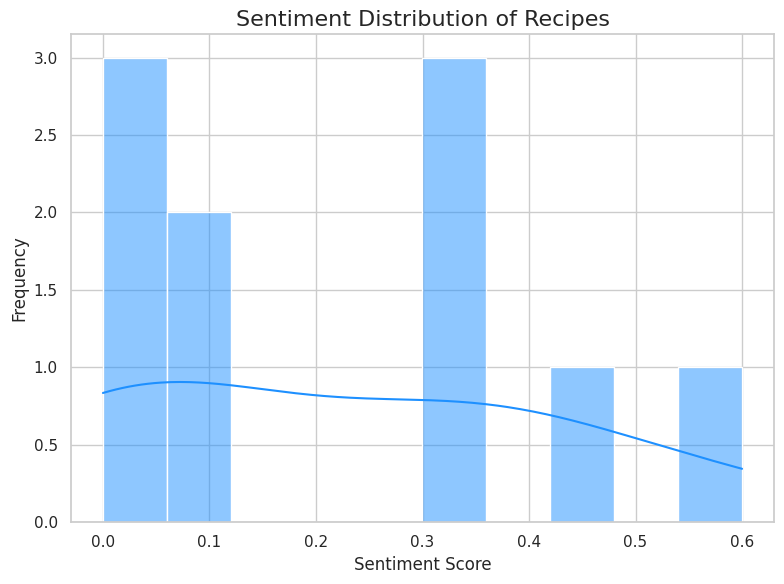

In [14]:
from textblob import TextBlob

def get_sentiment(description):
    blob = TextBlob(description)
    sentiment = blob.sentiment.polarity
    return sentiment


df['Sentiment'] = df['Recipe Description'].apply(get_sentiment)

plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment'], kde=True, color='dodgerblue', bins=10)
plt.title('Sentiment Distribution of Recipes', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-17-7145d1ff0b6a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingredient_counts.index, y=ingredient_counts.values, palette='coolwarm')


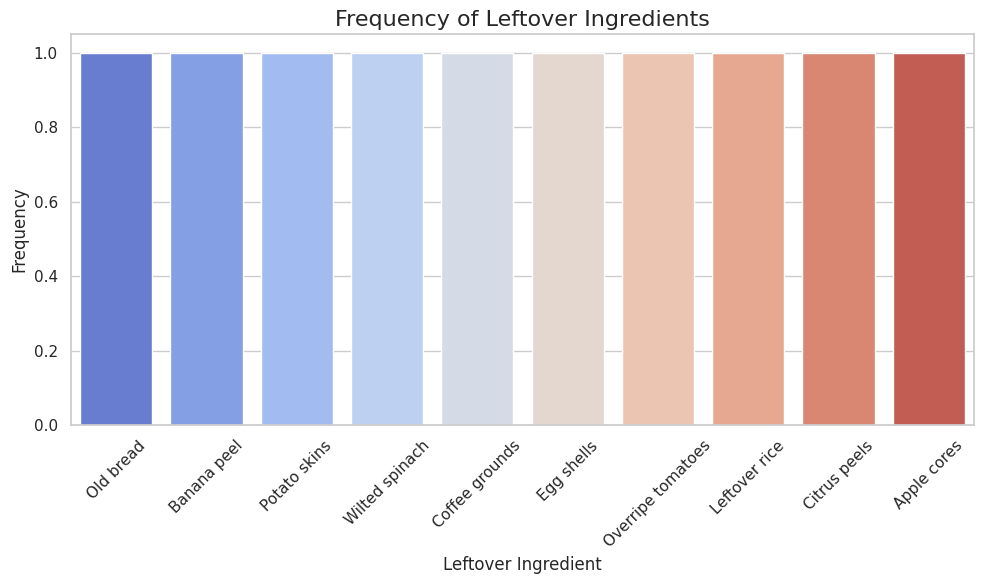

In [17]:
ingredient_counts = df['Leftover Ingredient'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_counts.index, y=ingredient_counts.values, palette='coolwarm')
plt.title('Frequency of Leftover Ingredients', fontsize=16)
plt.xlabel('Leftover Ingredient', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
